In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Analysis

In [ ]:
# Load thhe dataset in csv files

In [2]:
data=pd.read_csv('/content/insurance.csv')

In [4]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# show first five rows
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
data.shape

(1338, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Categorical Feature


*   Sex
*   🚭 Smoker

*   Region




In [11]:
# Checing for missing value in insurance datasets
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Data Analysis

In [13]:
# Statical Analysis of insurance datasets
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


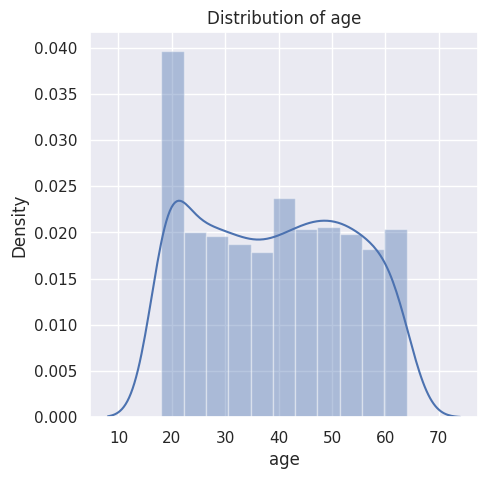

In [17]:
# Distrubution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['age'])
plt.title("Distribution of age")
plt.show()

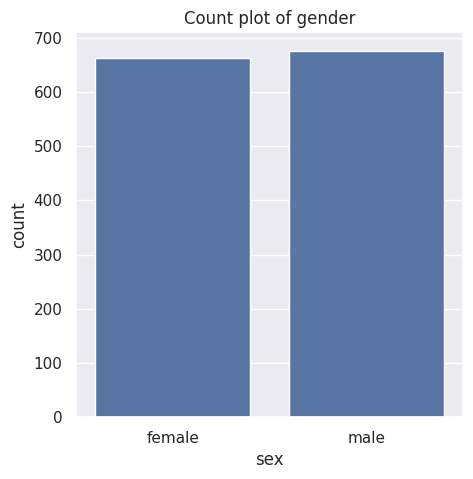

In [19]:
# Gender columns

plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=data)
plt.title("Count plot of gender")
plt.show()

In [22]:
data['sex'].value_counts()
print("Male:",data['sex'].value_counts()[0])
print("Female:",data['sex'].value_counts()[1])

Male: 676
Female: 662


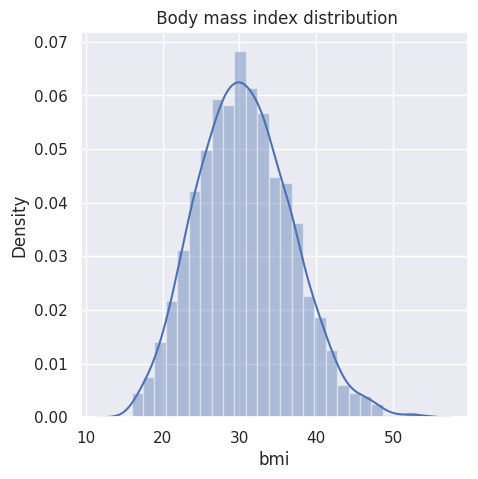

In [23]:
# BMI Distributions
plt.figure(figsize=(5,5))
sns.distplot(data['bmi'])
plt.title(" Body mass index distribution")
plt.show()

Normal Bmi range ----> 18.5 to 25


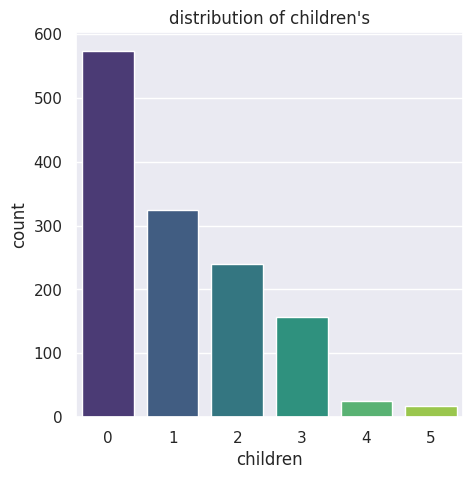

In [26]:
# Children columns
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=data,palette="viridis")
plt.title("distribution of children's")
plt.show()

In [28]:
data['children'].value_counts()
print("Children:",data['children'].value_counts())

Children: children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


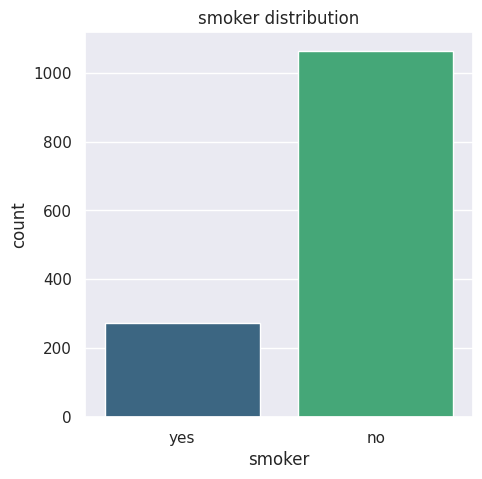

In [31]:
# Smoker columns
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=data,palette="viridis")
plt.title("smoker distribution")
plt.show()

In [35]:
data['smoker'].value_counts()
print("Smoker:",data['smoker'].value_counts())


Smoker: smoker
no     1064
yes     274
Name: count, dtype: int64


No Smoker -----> 1064



Yes Smoker ------> 274

---



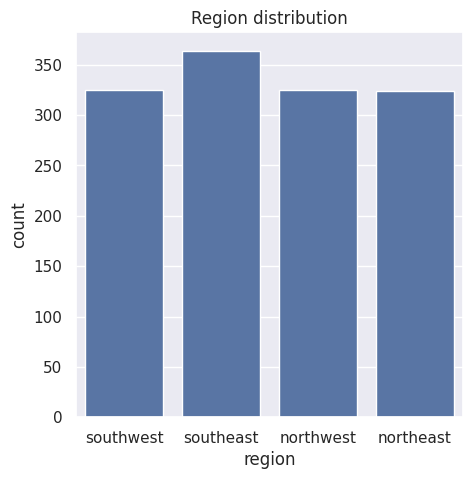

In [36]:
# Region columns
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=data)
plt.title("Region distribution")
plt.show()

In [37]:
data['region'].value_counts()


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


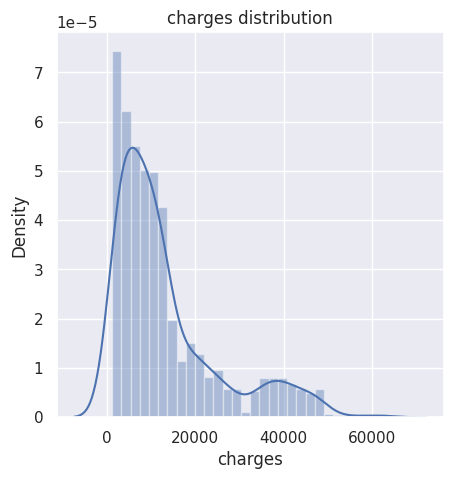

In [39]:
# charges columns
plt.figure(figsize=(5,5))
sns.distplot(data['charges'])
plt.title("charges distribution")
plt.show()

# Data Preprocessing
# Encoding the categorical features

In [40]:
# encoding sex columns
data.replace({'sex':{'male':0,'female':1}},inplace=True)

# encoding smoker columns
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# encoding of region  columns
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)



In [42]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,0,1,16884.9240
1,18,0,33.77,1,1,0,1725.5523
2,28,0,33.00,3,1,0,4449.4620


# Spliting features and targets columns'

In [43]:
X=data.drop(columns='charges',axis=1)
Y=data['charges']

In [44]:
print(X)  # this is my features columns

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [45]:
print(Y) # this is my target column's

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Spliting the data in traing and testing data

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)


In [47]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training Of Insurances Datasets

Linear regresion Model

In [48]:
insurance = LinearRegression()

In [49]:
insurance.fit(X_train,Y_train)

LinearRegression()

# Model Evaluations

In [50]:
traing_data_prediction = insurance.predict(X_train)

In [51]:
# r squared value
r2_train = metrics.r2_score(Y_train,traing_data_prediction)
print("R Squred Value:", r2_train)

R Squred Value: 0.751505643411174


In [52]:
# Predict on test data
test_data_prediction = insurance.predict(X_test)

In [53]:
# r squared value
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print("R Squred Value:", r2_test)

R Squred Value: 0.7447273869684076


R Squred Value: 0.751505643411174  Traing data

R Squred Value: 0.7447273869684076  Test Data


# Building a predictive system for predictions

In [57]:
input_data = (37,1,26.79,0,1,0)

# charging input data into a array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction = insurance.predict(input_data_reshaped)
print(prediction)
print("The insurance cost is USD", prediction[0])

[5615.6899984]
The insurance cost is USD 5615.689998398004


# Save This Model In Pickle Or  Joblie File

In [58]:
import joblib

In [59]:
# save this model
joblib.dump(insurance,'insurance_model.pkl')

['insurance_model.pkl']